# 1.3 Part 2: 1990

In [3]:
#Import Libraries
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [5]:
#Import the scaled dataset from last exercise
df_clean = pd.read_csv('/Users/ariedlin/Desktop/Career Foundry Assignments/Machine Learning/2. Data/weather_cleaned.csv')

In [7]:
df_clean.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  ...  VALENTIA_cloud_cover  \
0            10.9                     1  ...                     5   
1            10.1                     6  ...                     7   
2             9.9                     6  ...                     7   
3            10.6                     8  ...                     7   
4             6.0                     8  ...                     3   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88             1.0003                       0.45   
1               0.91             1.0007                       0.25   
2               0.91             1.0096                       0.17   
3               0.86             1.0184                       0.13   
4               0.80             1.0328                       0.46   

   VALENTIA_precipitation  VALENTIA_sunshine  VALENTIA_temp_mean  \
0                    0.34                4.7                 8.5   
1                    0.84                0.7                 8.9   
2                    0.08                0.1                10.5   
3                    0.98                0.0                 7.4   
4                    0.00                5.7                 5.7   

   VALENTIA_temp_min  VALENTIA_temp_max        DATE  
0                6.0               10.9  1960-01-01  
1                5.6               12.1  1960-01-02  
2                8.1               12.9  1960-01-03  
3                7.3               10.6  1960-01-04  
4                3.0                8.4  1960-01-05  

[5 rows x 136 columns]

In [9]:
#Reduce to just the mean temperatures
df = df_clean[['DATE', 'BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [11]:
df.shape

(22950, 16)

In [13]:
df.head()

DATE  BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
0  1960-01-01              6.5                 3.7                 2.4   
1  1960-01-02              6.1                 2.9                 2.3   
2  1960-01-03              8.5                 3.1                 2.7   
3  1960-01-04              6.3                 2.0                 2.0   
4  1960-01-05              3.0                 2.0                 2.5   

   DEBILT_temp_mean  DUSSELDORF_temp_mean  HEATHROW_temp_mean  \
0               9.3                  10.0                10.6   
1               7.7                   8.2                 6.1   
2               6.8                   7.1                 8.4   
3               6.7                   6.8                 9.4   
4               8.0                   7.7                 8.9   

   KASSEL_temp_mean  LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  \
0               7.9                 -0.6                   9.5   
1               7.7                  2.1                   8.6   
2               6.5                  4.6                   6.9   
3               5.8                  3.2                   7.0   
4               5.4                  3.6                   8.1   

   MADRID_temp_mean  MUNCHENB_temp_mean  OSLO_temp_mean  SONNBLICK_temp_mean  \
0               7.6                 6.9             4.9                 -5.9   
1               9.8                 6.2             3.4                 -9.5   
2               8.6                 5.8             1.9                 -9.5   
3              10.3                 3.9             3.0                -11.5   
4              12.1                 1.8             3.7                 -9.3   

   STOCKHOLM_temp_mean  VALENTIA_temp_mean  
0                  4.2                 8.5  
1                  4.0                 8.9  
2                  2.4                10.5  
3                  1.2                 7.4  
4                  3.3                 5.7

In [15]:
#Reduce dataset to a single year
df_1990 = df[df['DATE'].astype(str).str.contains('1990')] #1990
df_1990

DATE  BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
10958  1990-01-01             -2.1                -1.3                 0.1   
10959  1990-01-02             -1.8                -0.9                -0.4   
10960  1990-01-03             -2.2                -0.8                -0.5   
10961  1990-01-04             -0.7                -3.1                -2.0   
10962  1990-01-05              0.0                -5.7                -2.6   
...           ...              ...                 ...                 ...   
11318  1990-12-27              6.6                 3.8                 0.7   
11319  1990-12-28              3.8                 2.9                 1.8   
11320  1990-12-29             10.3                 1.3                -0.7   
11321  1990-12-30             12.0                 4.4                 1.0   
11322  1990-12-31              8.2                 6.2                 2.7   

       DEBILT_temp_mean  DUSSELDORF_temp_mean  HEATHROW_temp_mean  \
10958               0.5                   0.6                 4.5   
10959               1.0                   2.1                 5.2   
10960               1.8                   0.8                 4.0   
10961               0.3                   1.2                 5.3   
10962               3.3                   3.2                 6.6   
...                 ...                   ...                 ...   
11318               6.3                   5.0                 5.8   
11319               4.9                   5.6                 7.5   
11320               8.5                   8.0                 7.5   
11321               6.2                   7.3                 6.3   
11322               4.5                   5.5                 6.8   

       KASSEL_temp_mean  LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  \
10958              -1.3                 -1.5                   0.5   
10959              -0.7                 -1.9                   1.2   
10960              -1.5                 -0.7                   0.9   
10961              -1.5                 -1.8                  -0.8   
10962              -0.4                 -4.1                   1.9   
...                 ...                  ...                   ...   
11318               3.5                  1.0                   5.0   
11319               2.2                  1.7                   4.4   
11320               6.0                  1.8                   8.5   
11321               5.0                  4.1                   6.6   
11322               2.9                  2.9                   4.8   

       MADRID_temp_mean  MUNCHENB_temp_mean  OSLO_temp_mean  \
10958               7.7                -5.4            -6.7   
10959               6.5                -3.1            -5.9   
10960               7.0                -1.8            -7.6   
10961               6.5                -4.6            -2.0   
10962               6.9                -2.5            -0.8   
...                 ...                 ...             ...   
11318               8.7                 5.1             1.0   
11319               8.2                 0.6            -0.2   
11320               8.6                 8.4             0.8   
11321               8.3                 7.1            -3.0   
11322               7.8                 5.3            -6.5   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  VALENTIA_temp_mean  
10958                 -8.2                 -2.9                 6.9  
10959                -10.4                 -4.3                 7.3  
10960                -11.7                 -3.6                 7.8  
10961                -11.9                 -0.2                 6.5  
10962                -11.0                 -0.4                 9.4  
...                    ...                  ...                 ...  
11318                -11.5                  3.7                 7.4  
11319                -14.2                  2.2                 8.1  
11320              

In [17]:
df_1990.describe()

BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
count       365.000000          365.000000          365.000000   
mean         10.914247           13.044658           11.981644   
std           6.635710            7.915228            7.708399   
min          -3.000000           -9.700000           -8.300000   
25%           6.100000            7.100000            6.300000   
50%          11.200000           14.000000           12.400000   
75%          15.800000           18.900000           17.900000   
max          25.100000           28.000000           27.700000   

       DEBILT_temp_mean  DUSSELDORF_temp_mean  HEATHROW_temp_mean  \
count        365.000000            365.000000          365.000000   
mean          10.904384             11.710959           12.083562   
std            5.308730              5.989436            5.392073   
min           -0.300000             -0.200000            0.400000   
25%            6.700000              7.100000            7.600000   
50%           11.000000             11.900000           12.000000   
75%           14.500000             15.900000           15.800000   
max           25.300000             29.500000           27.400000   

       KASSEL_temp_mean  LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  \
count        365.000000           365.000000            365.000000   
mean           9.845753            10.712055             10.785205   
std            6.301327             7.530678              5.903985   
min           -2.700000            -8.000000             -1.500000   
25%            4.900000             4.900000              6.100000   
50%            9.700000            10.700000             10.800000   
75%           14.300000            16.200000             14.700000   
max           25.900000            25.600000             27.500000   

       MADRID_temp_mean  MUNCHENB_temp_mean  OSLO_temp_mean  \
count        365.000000          365.000000      365.000000   
mean          15.404932            9.041644        7.627397   
std            7.592396            7.350837        6.806491   
min            2.000000          -10.800000       -9.500000   
25%            9.000000            3.600000        2.500000   
50%           14.100000            9.600000        7.100000   
75%           22.300000           14.600000       13.500000   
max           31.000000           24.500000       21.000000   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  VALENTIA_temp_mean  
count           365.000000           365.000000          365.000000  
mean             -4.793425             8.401370           11.173699  
std               5.927313             6.344767            3.650353  
min             -21.700000            -5.300000            3.100000  
25%              -8.600000             2.900000            8.100000  
50%              -4.300000             8.000000           11.200000  
75%              -0.500000            14.000000           13.600000  
max               7.800000            23.300000           20.600000

# BASEL 1990

In [20]:
#Drop the DATE data as those numbers are not scaled with the rest.
notemp_1990 = df_1990.drop(['DATE',], axis=1)

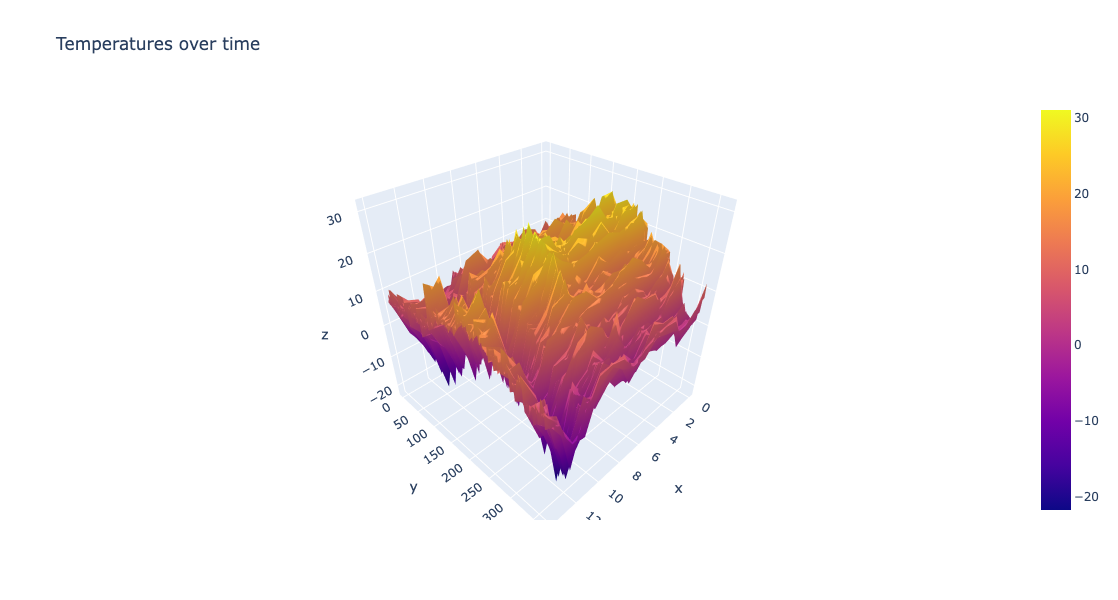

In [24]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notemp_1990.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [26]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66

i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [28]:
n_rows = df_1990.shape[0]
n_rows

365

In [30]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=df_1990['BASEL_temp_mean'].to_numpy().reshape(n_rows,1) #For BASEL

In [32]:
#Check the shape of X and Y
X.shape, y.shape

((365, 2), (365, 1))

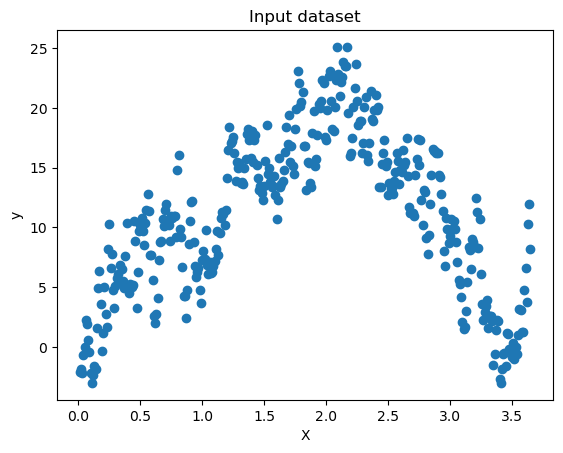

In [34]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=df_1990['BASEL_temp_mean']) #For BASEL
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [36]:
#what is the min temperature? 
df_1990['BASEL_temp_mean'].min()

-3.0

In [38]:
#what is the max temperature?
df_1990['BASEL_temp_mean'].max()

25.1

In [40]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [42]:
compute_cost(X,y)

array([81.51639726])

In [50]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [56]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations= 3000 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.00025 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 2.2 s, sys: 26.1 ms, total: 2.23 s
Wall time: 2.35 s


In [68]:
theta

array([[3.33378512],
       [3.31600899]])

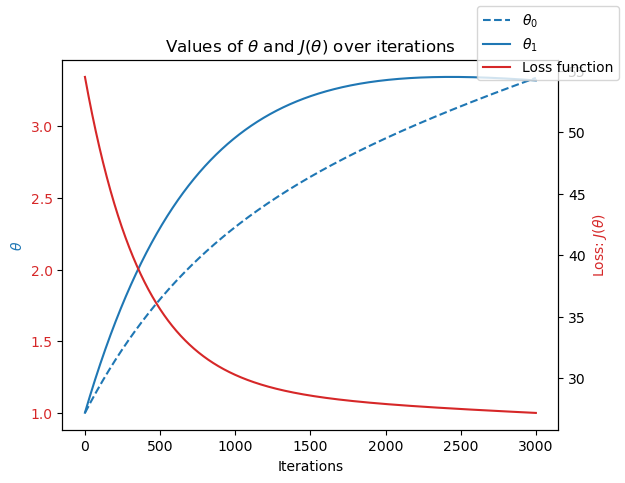

In [58]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [70]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 2.28 s, sys: 22.3 ms, total: 2.31 s
Wall time: 2.33 s


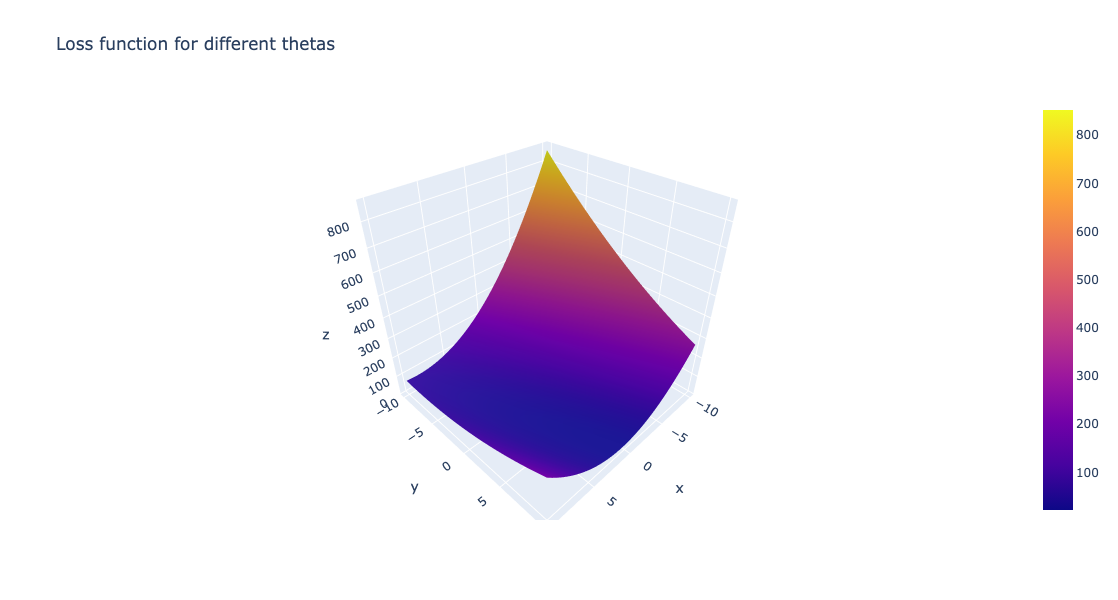

In [72]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

# Belgrade 1990

In [77]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=df_1990['BELGRADE_temp_mean'].to_numpy().reshape(n_rows,1) #For BELGRADE

In [79]:
#Check the shape of X and Y
X.shape, y.shape

((365, 2), (365, 1))

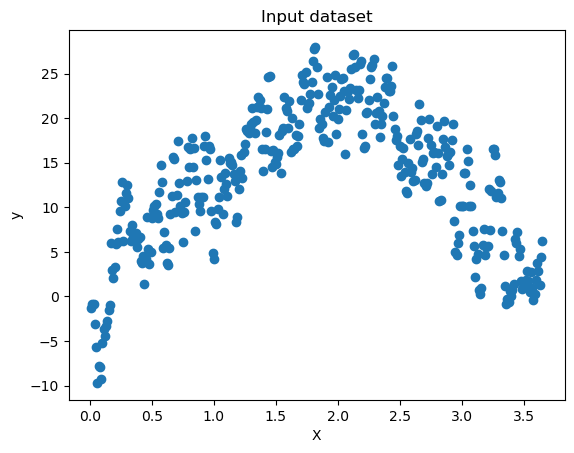

In [81]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=df_1990['BELGRADE_temp_mean']) #For BELGRADE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [83]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [85]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations= 3000 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.00025 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 2.12 s, sys: 24.5 ms, total: 2.14 s
Wall time: 2.17 s


In [87]:
theta

array([[3.87253974],
       [4.03658299]])

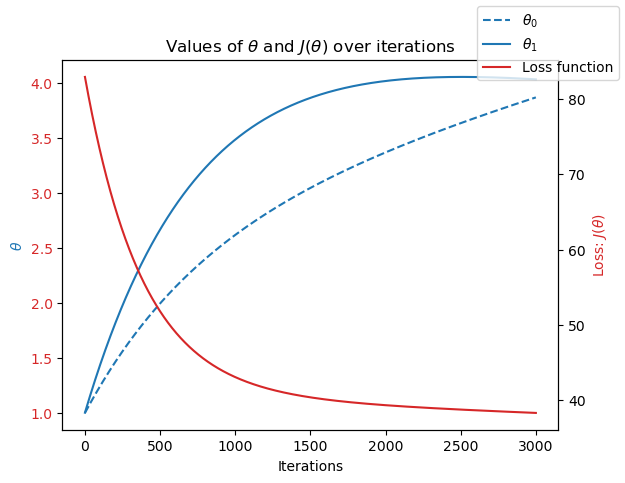

In [89]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [91]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 2.37 s, sys: 30.3 ms, total: 2.4 s
Wall time: 2.43 s


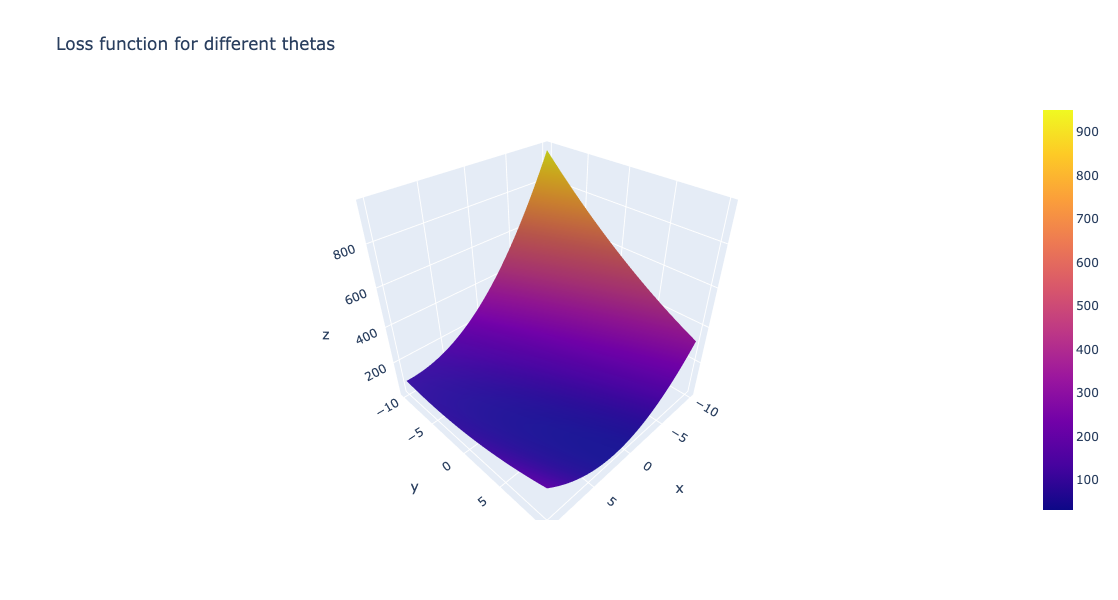

In [93]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

# Budapest 1990

In [96]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=df_1990['BUDAPEST_temp_mean'].to_numpy().reshape(n_rows,1) #For BUDAPEST

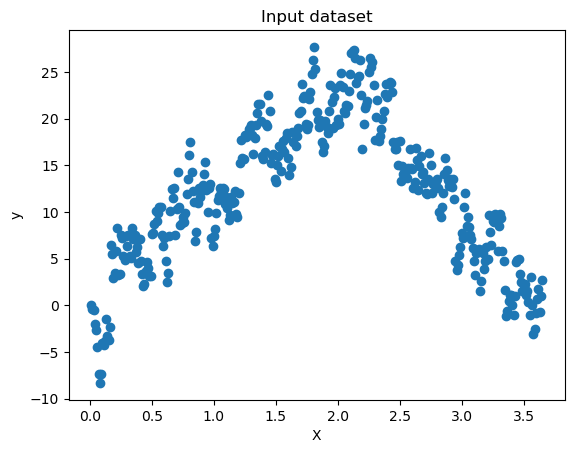

In [100]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=df_1990['BUDAPEST_temp_mean']) #For BUDAPEST
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [104]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [106]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations= 3000 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.00025 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 2.02 s, sys: 16 ms, total: 2.04 s
Wall time: 2.05 s


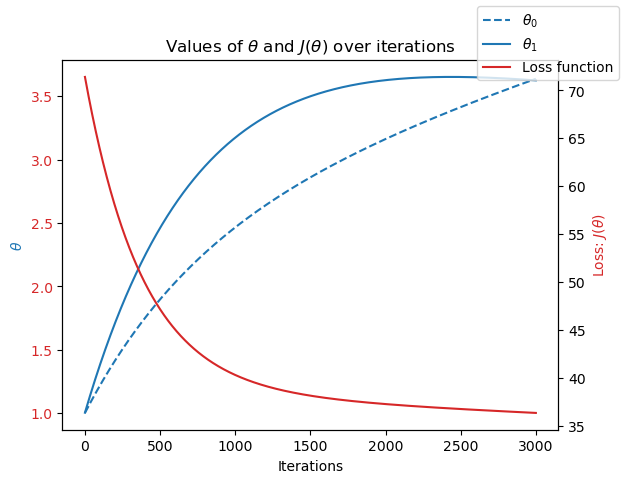

In [108]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [110]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 2.37 s, sys: 51.1 ms, total: 2.42 s
Wall time: 2.55 s


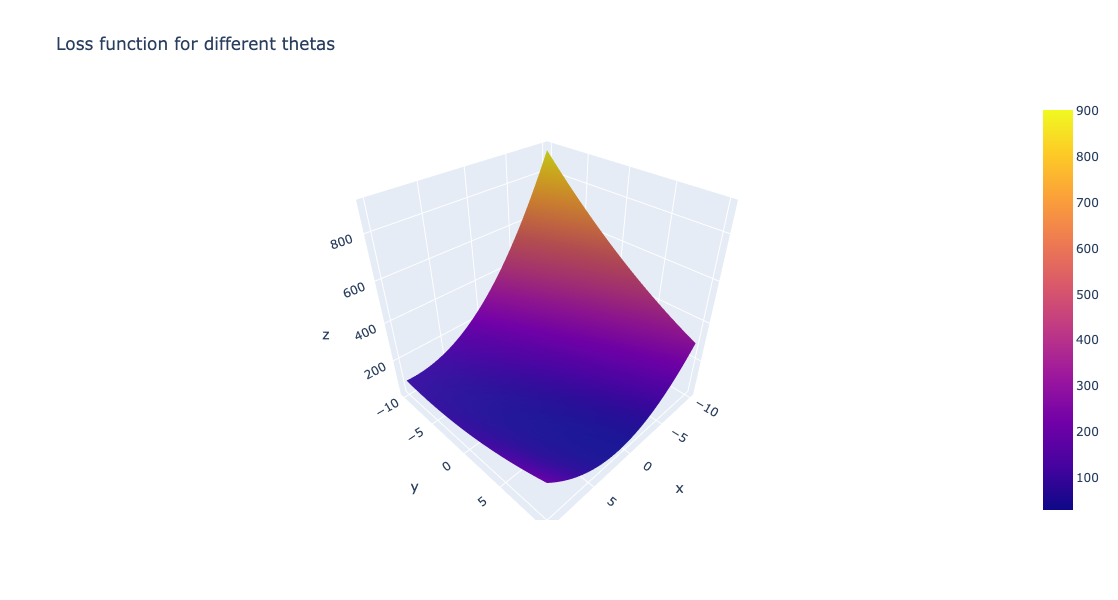

In [112]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()